In [1]:
import pandas as pd

In [2]:
pref = pd.read_csv("COVID-19-jp/nhk_news_covid19_prefectures_daily_data.csv")
pref["日付"] = pd.to_datetime(pref["日付"] )
print(len(pref))
pref.tail()

23077


,日付,都道府県コード,都道府県名,各地の感染者数_1日ごとの発表数,各地の感染者数_累計,各地の死者数_1日ごとの発表数,各地の死者数_累計
23072,2021-05-16,47,沖縄県,78,13859,0,141
23073,2021-05-17,47,沖縄県,59,13918,1,142
23074,2021-05-18,47,沖縄県,168,14086,4,146
23075,2021-05-19,47,沖縄県,203,14289,0,146
23076,2021-05-20,47,沖縄県,198,14487,1,147


In [3]:
all_jp = pref.groupby(["都道府県名"], as_index=False).sum()
del all_jp["各地の感染者数_累計"]
del all_jp["各地の死者数_累計"]
#all_jp = all_jp.rename(columns={"各地の感染者数合計":"各地の感染者数_1日ごとの発表数"})
all_jp = all_jp.rename(columns={"各地の感染者数_1日ごとの発表数":"各地の感染者数合計"})
all_jp = all_jp.rename(columns={"各地の死者数_1日ごとの発表数":"各地の死者数合計"})
all_jp.tail()

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計
42,静岡県,10802,7718,131
43,香川県,18167,1883,24
44,高知県,19149,1198,20
45,鳥取県,15221,444,2
46,鹿児島県,22586,3025,28


## 都道府県ごとの最新データを付与

In [4]:
# 直近１週間の感染者数
pref["直近1週間の感染者数"] = pref["各地の感染者数_1日ごとの発表数"].rolling(7).sum()
pref.tail(7)

,日付,都道府県コード,都道府県名,各地の感染者数_1日ごとの発表数,各地の感染者数_累計,各地の死者数_1日ごとの発表数,各地の死者数_累計,直近1週間の感染者数
23070,2021-05-14,47,沖縄県,134,13621,0,140,733.0
23071,2021-05-15,47,沖縄県,160,13781,1,141,800.0
23072,2021-05-16,47,沖縄県,78,13859,0,141,775.0
23073,2021-05-17,47,沖縄県,59,13918,1,142,798.0
23074,2021-05-18,47,沖縄県,168,14086,4,146,834.0
23075,2021-05-19,47,沖縄県,203,14289,0,146,928.0
23076,2021-05-20,47,沖縄県,198,14487,1,147,1000.0


### 感染者数前日比

In [5]:
import numpy as np
pref["新規感染者数前日比"] = pref["各地の感染者数_1日ごとの発表数"].pct_change()
# 一番古い日付だけNANを設定
pref.loc[pref["日付"]==pref["日付"].min(),"新規感染者数前日比"] = np.nan
pref["直近1週間の新規感染者数前日比平均"] = pref["新規感染者数前日比"].rolling(7).mean()
pref.tail()

,日付,都道府県コード,都道府県名,各地の感染者数_1日ごとの発表数,各地の感染者数_累計,各地の死者数_1日ごとの発表数,各地の死者数_累計,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均
23072,2021-05-16,47,沖縄県,78,13859,0,141,775.0,-0.512500,0.248989
23073,2021-05-17,47,沖縄県,59,13918,1,142,798.0,-0.243590,0.307117
23074,2021-05-18,47,沖縄県,168,14086,4,146,834.0,1.847458,0.190087
23075,2021-05-19,47,沖縄県,203,14289,0,146,928.0,0.208333,0.244741
23076,2021-05-20,47,沖縄県,198,14487,1,147,1000.0,-0.024631,0.218942


In [6]:
latest = pref.loc[pref["日付"]==pref["日付"].max()][["都道府県名","直近1週間の感染者数","新規感染者数前日比","直近1週間の新規感染者数前日比平均"]]
latest.head()

,都道府県名,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均
490,北海道,3839.0,0.127483,0.015056
981,青森県,204.0,1.750000,0.431840
1472,岩手県,146.0,0.388889,0.105059
1963,宮城県,212.0,-0.151515,0.107234
2454,秋田県,77.0,0.285714,0.596366


In [7]:
all_jp = pd.merge(all_jp, latest, on="都道府県名")
all_jp.head()

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均
0,三重県,11784,4617,99,307.0,-0.280000,0.013288
1,京都府,12766,15146,200,914.0,-0.052239,-0.016562
2,佐賀県,20131,2342,17,214.0,-0.500000,-0.019068
3,兵庫県,13748,38367,1055,1698.0,-0.136364,0.010791
4,北海道,491,32591,973,3839.0,0.127483,0.015056


## 人口データを付与

In [8]:
pop = pd.read_excel("COVID-19-jp/2001stjin.xls",header=3)[["Unnamed: 1","計"]]
pop.rename(columns={"Unnamed: 1":"都道府県名"},inplace=True)
pop.rename(columns={"計":"人口"},inplace=True)
pop = pop.loc[pop["都道府県名"]!="合計"].reset_index(drop=True)

In [9]:
all_jp = pd.merge(all_jp, pop, on="都道府県名", how="left")
all_jp.head()

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均,人口
0,三重県,11784,4617,99,307.0,-0.280000,0.013288,1813859
1,京都府,12766,15146,200,914.0,-0.052239,-0.016562,2545899
2,佐賀県,20131,2342,17,214.0,-0.500000,-0.019068,823810
3,兵庫県,13748,38367,1055,1698.0,-0.136364,0.010791,5549568
4,北海道,491,32591,973,3839.0,0.127483,0.015056,5267762


## 人口当たりの感染者数

In [10]:
all_jp["１万人当たりの感染者数"] = all_jp["各地の感染者数合計"] / (all_jp["人口"] / 10000)
all_jp["10万人当たりの感染者数"] = all_jp["各地の感染者数合計"] / (all_jp["人口"] / 100000)
all_jp["直近1週間の10万人当たりの感染者数"] = all_jp["直近1週間の感染者数"] / (all_jp["人口"] / 100000)
all_jp.sort_values("都道府県コード")

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均,人口,１万人当たりの感染者数,10万人当たりの感染者数,直近1週間の10万人当たりの感染者数
4,北海道,491,32591,973,3839.0,0.127483,0.015056,5267762,61.868778,618.687784,72.877248
41,青森県,982,2099,27,204.0,1.750000,0.431840,1275783,16.452641,164.526412,15.990180
19,岩手県,1473,1300,42,146.0,0.388889,0.105059,1235517,10.521911,105.219111,11.816916
11,宮城県,1964,8669,81,212.0,-0.151515,0.107234,2292385,37.816510,378.165099,9.248010
36,秋田県,2455,727,11,77.0,0.285714,0.596366,985416,7.377595,73.775948,7.813959
15,山形県,2946,1798,37,139.0,-0.041667,0.045544,1082296,16.612831,166.128305,12.843067
35,福島県,3437,4368,133,254.0,-0.139535,0.056193,1881981,23.209586,232.095861,13.496417
38,茨城県,3928,9246,139,429.0,0.050847,0.075069,2921436,31.648819,316.488193,14.684559
27,栃木県,4419,5983,74,252.0,-0.027027,0.033865,1965516,30.439844,304.398438,12.821061
37,群馬県,4910,7431,122,396.0,-0.089552,0.013548,1969439,37.731557,377.315571,20.107249


## 感染者数

### 平均値、中央値

In [11]:
all_jp["各地の感染者数合計"].describe()

count        47.000000
mean      14939.553191
std       27987.150249
min         444.000000
25%        2220.500000
50%        4500.000000
75%        9232.500000
max      154999.000000
Name: 各地の感染者数合計, dtype: float64

### TOP 10

In [12]:
all_jp.sort_values("各地の感染者数合計", ascending=False).reset_index(drop=True).head(10)

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均,人口,１万人当たりの感染者数,10万人当たりの感染者数,直近1週間の10万人当たりの感染者数
0,東京都,6383,154999,1997,4928.0,0.100522,0.016950,13834925,112.034579,1120.345792,35.619998
1,大阪府,13257,96643,2068,3849.0,0.050314,-0.022169,8849635,109.205634,1092.056339,43.493319
2,神奈川県,6874,58894,865,1987.0,0.144981,0.003445,9209442,63.949586,639.495857,21.575683
3,愛知県,11293,42971,696,3915.0,-0.049550,0.028792,7575530,56.723424,567.234240,51.679552
4,埼玉県,5401,42293,771,1459.0,0.187500,-0.007524,7390054,57.229622,572.296224,19.742752
5,兵庫県,13748,38367,1055,1698.0,-0.136364,0.010791,5549568,69.135111,691.351111,30.596976
6,千葉県,5892,35934,659,907.0,-0.136364,-0.032681,6319772,56.859646,568.596462,14.351784
7,北海道,491,32591,973,3839.0,0.127483,0.015056,5267762,61.868778,618.687784,72.877248
8,福岡県,19640,31766,404,3024.0,-0.200401,0.005786,5129841,61.923947,619.239466,58.949196
9,京都府,12766,15146,200,914.0,-0.052239,-0.016562,2545899,59.491755,594.917552,35.900874


## １万人あたりの感染者数

### 平均値、中央値

In [13]:
all_jp["１万人当たりの感染者数"].describe()

count     47.000000
mean      35.316915
std       25.202320
min        7.095289
25%       18.801028
50%       26.626444
75%       47.157985
max      112.034579
Name: １万人当たりの感染者数, dtype: float64

## 直近１週間の１０万人あたりの感染者数

In [14]:
all_jp.sort_values(["直近1週間の10万人当たりの感染者数"],ascending=False).head(10)

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均,人口,１万人当たりの感染者数,10万人当たりの感染者数,直近1週間の10万人当たりの感染者数
4,北海道,491,32591,973,3839.0,0.127483,0.015056,5267762,61.868778,618.687784,72.877248
28,沖縄県,23077,14487,147,1000.0,-0.024631,0.218942,1481547,97.782926,977.829256,67.497015
34,福岡県,19640,31766,404,3024.0,-0.200401,0.005786,5129841,61.923947,619.239466,58.949196
18,岡山県,16203,6631,80,1017.0,-0.082090,-0.029499,1903627,34.833505,348.335047,53.424332
21,広島県,16694,9219,117,1481.0,-0.045045,0.003946,2826858,32.612179,326.121793,52.390322
24,愛知県,11293,42971,696,3915.0,-0.049550,0.028792,7575530,56.723424,567.234240,51.679552
9,大阪府,13257,96643,2068,3849.0,0.050314,-0.022169,8849635,109.205634,1092.056339,43.493319
17,岐阜県,10311,7889,148,861.0,-0.181818,0.045472,2032490,38.814459,388.144591,42.361832
30,熊本県,21113,5765,89,650.0,-0.200000,0.030086,1769880,32.572830,325.728298,36.725654
1,京都府,12766,15146,200,914.0,-0.052239,-0.016562,2545899,59.491755,594.917552,35.900874


### 直近１週間の新規感染者 増加速度

#### WORST 10(増加速度の早い順)

In [15]:
all_jp.sort_values("直近1週間の新規感染者数前日比平均",ascending=False).head(10)

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均,人口,１万人当たりの感染者数,10万人当たりの感染者数,直近1週間の10万人当たりの感染者数
36,秋田県,2455,727,11,77.0,0.285714,0.596366,985416,7.377595,73.775948,7.813959
41,青森県,982,2099,27,204.0,1.750000,0.431840,1275783,16.452641,164.526412,15.990180
20,島根県,15712,482,0,76.0,0.083333,0.420635,679324,7.095289,70.952888,11.187592
33,福井県,8838,1008,34,36.0,-0.555556,0.404762,780053,12.922199,129.221989,4.615071
44,高知県,19149,1198,20,59.0,-0.333333,0.365136,709230,16.891558,168.915585,8.318881
13,富山県,7856,1613,34,162.0,-0.088235,0.360556,1055999,15.274636,152.746357,15.340924
14,山口県,17185,2609,55,330.0,-0.160714,0.262549,1369882,19.045436,190.454360,24.089666
28,沖縄県,23077,14487,147,1000.0,-0.024631,0.218942,1481547,97.782926,977.829256,67.497015
6,和歌山県,14730,2527,36,85.0,-0.285714,0.210534,954258,26.481308,264.813080,8.907444
29,滋賀県,12275,4687,74,326.0,0.148936,0.143629,1420948,32.985021,329.850213,22.942430


#### BEST 10(増加速度の遅い順／減少速度の速い順)

In [16]:
all_jp.sort_values("直近1週間の新規感染者数前日比平均",ascending=True).head(10)

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均,人口,１万人当たりの感染者数,10万人当たりの感染者数,直近1週間の10万人当たりの感染者数
23,愛媛県,18658,2648,68,61.0,0.000000,-0.158065,1369131,19.340735,193.407351,4.455381
22,徳島県,17676,1599,58,57.0,-0.200000,-0.085468,742505,21.535209,215.352085,7.676716
42,静岡県,10802,7718,131,551.0,-0.202703,-0.051980,3708556,20.811335,208.113347,14.857535
5,千葉県,5892,35934,659,907.0,-0.136364,-0.032681,6319772,56.859646,568.596462,14.351784
18,岡山県,16203,6631,80,1017.0,-0.082090,-0.029499,1903627,34.833505,348.335047,53.424332
46,鹿児島県,22586,3025,28,263.0,-0.025000,-0.026172,1630146,18.556620,185.566201,16.133524
9,大阪府,13257,96643,2068,3849.0,0.050314,-0.022169,8849635,109.205634,1092.056339,43.493319
10,奈良県,14239,7514,100,425.0,-0.450704,-0.021485,1353837,55.501512,555.015116,31.392258
39,長崎県,20622,2803,57,155.0,-0.125000,-0.021096,1350769,20.751142,207.511425,11.474945
2,佐賀県,20131,2342,17,214.0,-0.500000,-0.019068,823810,28.428885,284.288853,25.976864


## グラフ化

In [17]:
import matplotlib.pyplot as plt
%matplotlib notebook
#%matplotlib inline

In [18]:
all_jp_desc = all_jp.sort_values(["各地の感染者数合計"],ascending=False)
all_jp_desc_10k = all_jp.sort_values(["１万人当たりの感染者数"],ascending=False)
all_jp_desc_100k = all_jp.sort_values(["直近1週間の10万人当たりの感染者数"],ascending=False)

<IPython.core.display.Javascript object>


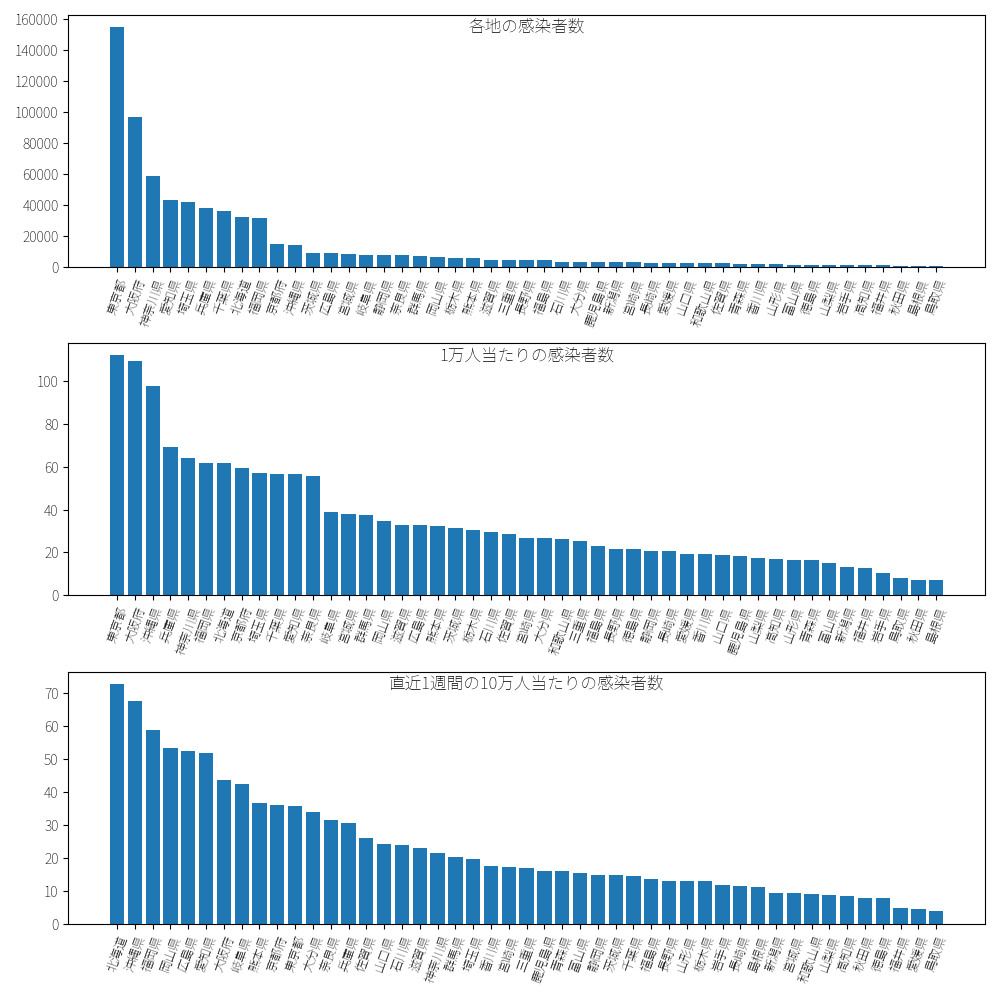

In [19]:
fig = plt.figure(figsize=(10,10))
plt.subplot(3,1,1) # (rows, columns, panel number)
plt.xticks(rotation="70",fontsize=9)
plt.bar(all_jp_desc["都道府県名"], all_jp_desc["各地の感染者数合計"])
plt.title("各地の感染者数", y=0.9)

plt.subplot(3,1,2) # (rows, columns, panel number)
plt.xticks(rotation="70",fontsize=9)
plt.bar(all_jp_desc_10k["都道府県名"], all_jp_desc_10k["１万人当たりの感染者数"])
plt.title("1万人当たりの感染者数",y=0.9)


plt.subplot(3,1,3) # (rows, columns, panel number)
plt.xticks(rotation="70",fontsize=9)
plt.bar(all_jp_desc_100k["都道府県名"], all_jp_desc_100k["直近1週間の10万人当たりの感染者数"])
plt.title("直近1週間の10万人当たりの感染者数",y=0.9)

fig.tight_layout()


## 度数分布表

In [20]:
import numpy as np
data = np.array(all_jp["各地の感染者数合計"])
 
# ヒストグラム
hist, bin_edges = np.histogram(data, bins=8)

print(hist)
print(bin_edges)

[38  4  2  1  1  0  0  1]
[   444.     19763.375  39082.75   58402.125  77721.5    97040.875
 116360.25  135679.625 154999.   ]


## ヒストグラム

<IPython.core.display.Javascript object>


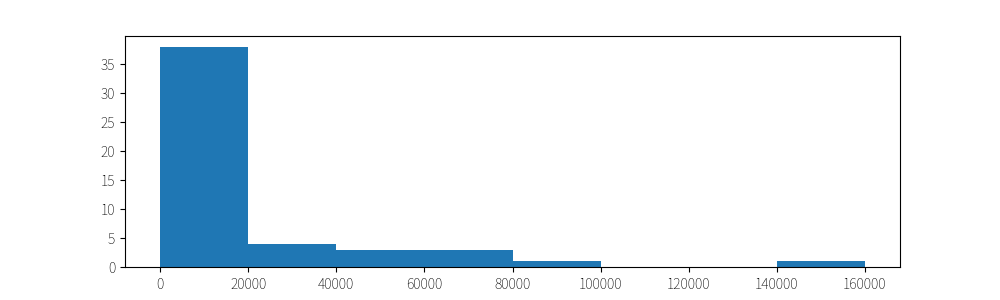

(array([38.,  4.,  3.,  1.,  0.,  0.,  1.]),
 array([     0,  20000,  40000,  80000, 100000, 120000, 140000, 160000]),
 <a list of 7 Patch objects>)

In [21]:
fig = plt.figure(figsize=(10,3))
plt.hist(all_jp_desc["各地の感染者数合計"],bins=[0,20000,40000,80000,100000,120000,140000,160000])

<IPython.core.display.Javascript object>


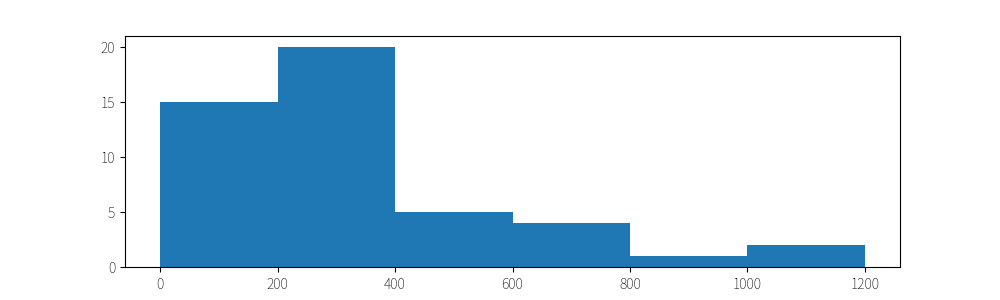

(array([15., 20.,  5.,  4.,  1.,  2.]),
 array([   0,  200,  400,  600,  800, 1000, 1200]),
 <a list of 6 Patch objects>)

In [22]:
fig = plt.figure(figsize=(10,3))
plt.hist(all_jp_desc["10万人当たりの感染者数"],bins=[0,200,400,600,800,1000,1200])
